# Telco Customer Churn Analysis

### Import libraries & load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
filepath = Path("__file__").parent / "telco-customer-churn.csv"
df = pd.read_csv(filepath)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Overview

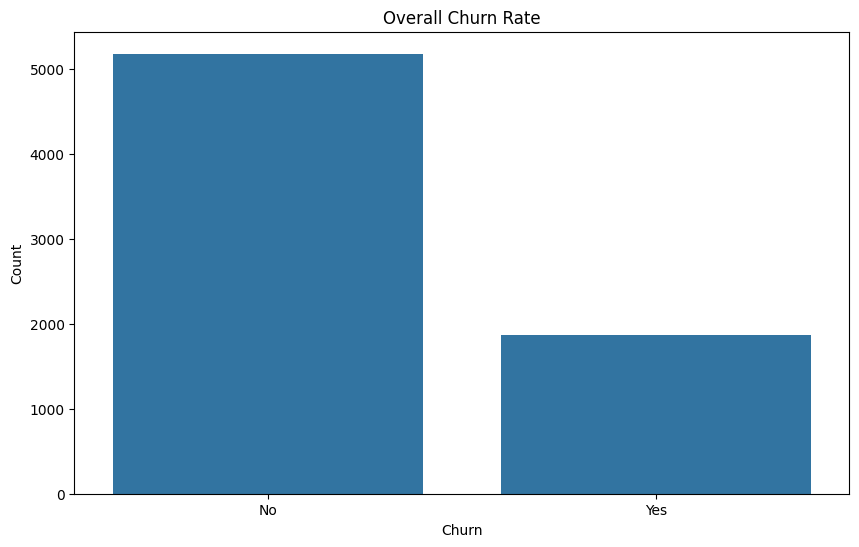

Overall Churn Rate: 1869.0%


In [4]:
# 1. Overall Churn Rate
def plot_overall_churn():
    plt.figure(figsize=(10, 6))
    churn_counts = df['Churn'].value_counts()
    sns.barplot(x=churn_counts.index, y=churn_counts.values)
    plt.title('Overall Churn Rate')
    plt.ylabel('Count')
    plt.show()
    
    print(f"Overall Churn Rate: {churn_counts['Yes']:.1f}%")

plot_overall_churn()

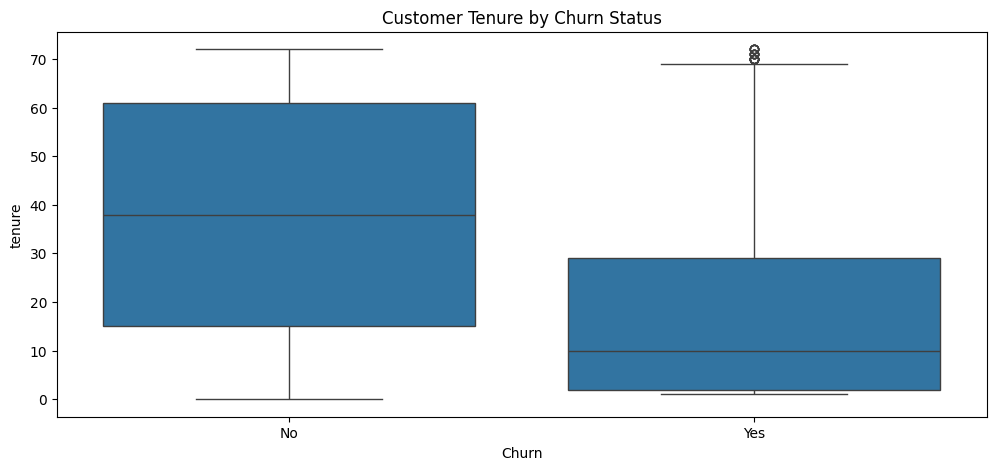


Average Tenure Statistics:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [8]:
    # 2. Customer Tenure Analysis
    def analyze_tenure():
        plt.figure(figsize=(12, 5))
        sns.boxplot(x='Churn', y='tenure', data=df)
        plt.title('Customer Tenure by Churn Status')
        plt.show()
        
        print("\nAverage Tenure Statistics:")
        print(df.groupby('Churn')['tenure'].describe())

analyze_tenure()

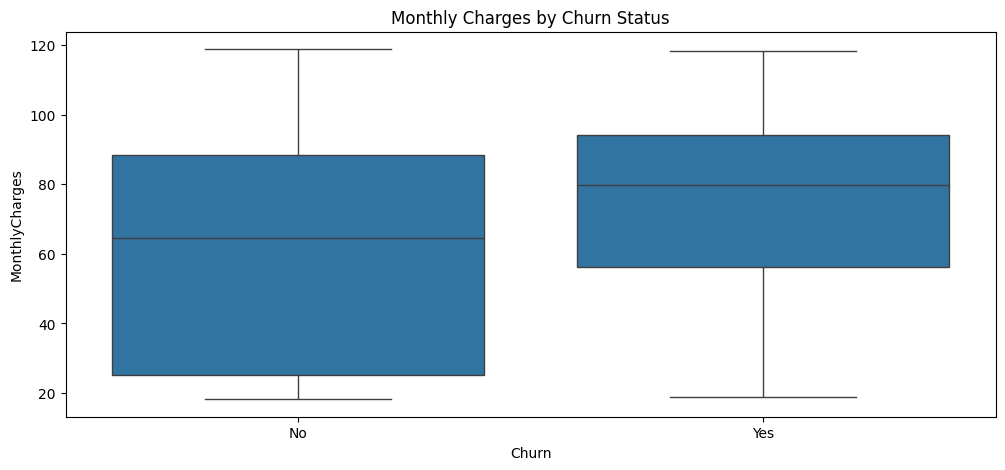


Monthly Charges Statistics:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


In [9]:
# 3. Monthly Charges Analysis
def analyze_charges():
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
    plt.title('Monthly Charges by Churn Status')
    plt.show()
    
    print("\nMonthly Charges Statistics:")
    print(df.groupby('Churn')['MonthlyCharges'].describe())

analyze_charges()

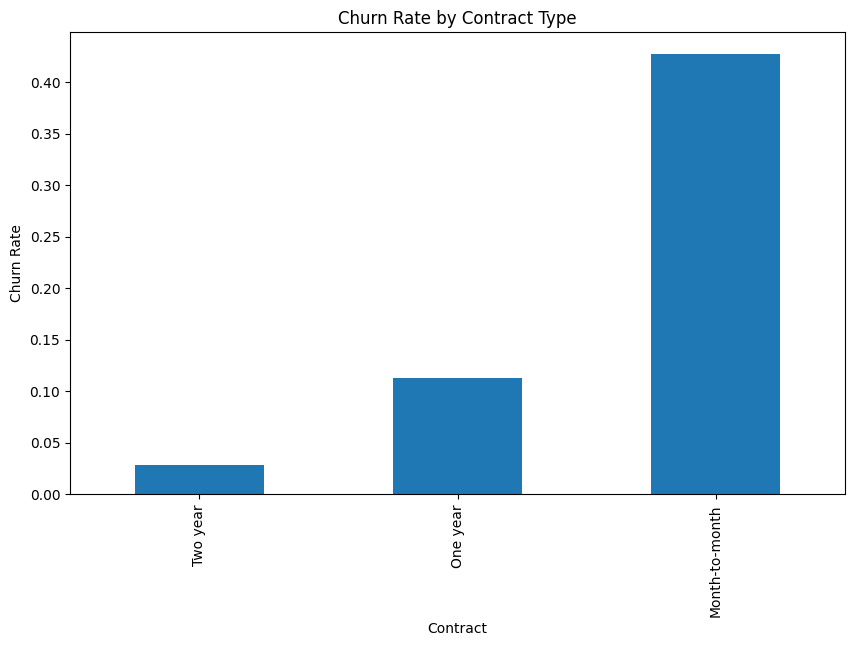

In [11]:
# 4. Contract Type Impact
def analyze_contract():
    plt.figure(figsize=(10, 6))
    contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
    contract_churn['Yes'].sort_values().plot(kind='bar')
    plt.title('Churn Rate by Contract Type')
    plt.ylabel('Churn Rate')
    plt.show()

analyze_contract()
        

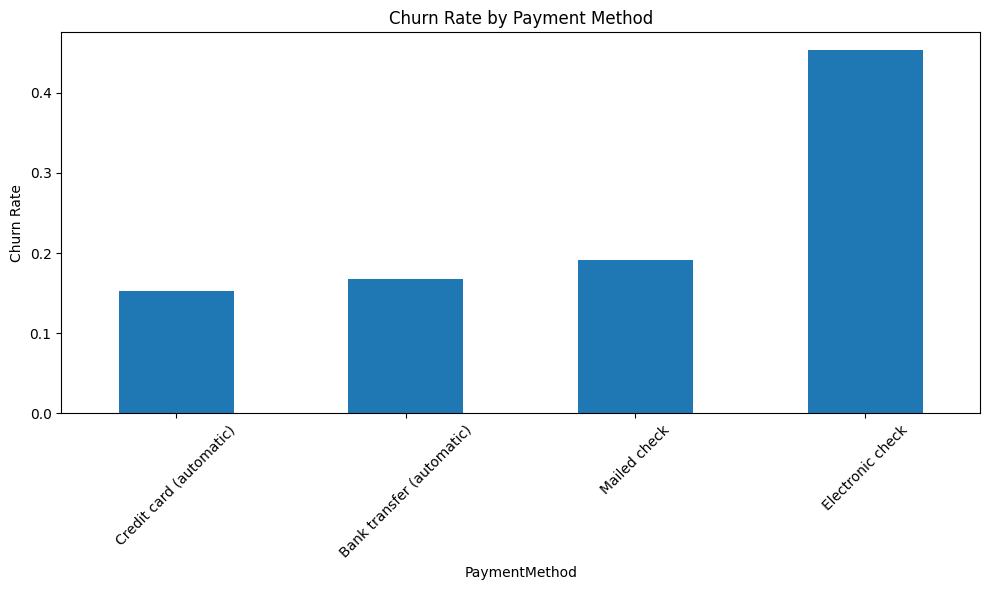

In [14]:
# 6. Payment Method Analysis
def analyze_payment():
    plt.figure(figsize=(10, 6))
    payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
    payment_churn['Yes'].sort_values().plot(kind='bar')
    plt.title('Churn Rate by Payment Method')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_payment()